# Ethereum Forcasting

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
df = pd.read_csv('../datasets/EthereumHistoricalData.csv', parse_dates=[0], index_col=0)

In [3]:
df.sort_index(axis=0, inplace=True)

In [4]:
df

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2016-03-10,11.75,11.20,11.85,11.07,0.00K,4.91%
2016-03-11,11.95,11.75,11.95,11.75,0.18K,1.70%
2016-03-12,12.92,11.95,13.45,11.95,0.83K,8.12%
2016-03-13,15.07,12.92,15.07,12.92,1.30K,16.64%
2016-03-14,12.50,15.07,15.07,11.40,92.18K,-17.05%
...,...,...,...,...,...,...
2022-02-22,"2,636.13","2,569.19","2,663.01","2,501.40",841.13K,2.58%
2022-02-23,"2,578.15","2,637.38","2,749.80","2,578.15",636.50K,-2.20%
2022-02-24,"2,596.52","2,578.54","2,732.02","2,303.07",1.85M,0.71%


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2180 entries, 2016-03-10 to 2022-02-26
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Price     2180 non-null   object
 1   Open      2180 non-null   object
 2   High      2180 non-null   object
 3   Low       2180 non-null   object
 4   Vol.      2180 non-null   object
 5   Change %  2180 non-null   object
dtypes: object(6)
memory usage: 119.2+ KB


## Preprocessing

In [6]:
def format_data(num):
    nums = num.split(',');
    if(len(nums) == 2):
        n = float(nums[0] + nums[1])
    else:
        n = float(nums[0])
    return n

In [7]:
df['Price'] = df['Price'].apply(format_data)

In [8]:
df['Open'] = df['Open'].apply(format_data)

In [9]:
df['High'] = df['High'].apply(format_data)

In [10]:
df['Low'] = df['Low'].apply(format_data)

In [11]:
def format_vol(x):
    if(x[-1] == 'K'):
        n = float(x[:-1]) * 1000
    elif(x[-1] == 'M'):
        n = float(x[:-1]) * 1000000
    elif(x == '-'):
        n = 0
    return n

In [12]:
df['Vol.'] = df['Vol.'].apply(format_vol)

In [13]:
def formate_change(x):
    n = float(x[:-1])
    return n

In [14]:
df['Change %'] = df['Change %'].apply(formate_change)

In [15]:
df

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2016-03-10,11.75,11.20,11.85,11.07,0.0,4.91
2016-03-11,11.95,11.75,11.95,11.75,180.0,1.70
2016-03-12,12.92,11.95,13.45,11.95,830.0,8.12
2016-03-13,15.07,12.92,15.07,12.92,1300.0,16.64
2016-03-14,12.50,15.07,15.07,11.40,92180.0,-17.05
...,...,...,...,...,...,...
2022-02-22,2636.13,2569.19,2663.01,2501.40,841130.0,2.58
2022-02-23,2578.15,2637.38,2749.80,2578.15,636500.0,-2.20
2022-02-24,2596.52,2578.54,2732.02,2303.07,1850000.0,0.71


In [16]:
df.isnull().sum()

Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64

In [17]:
df.isna().sum()

Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2180 entries, 2016-03-10 to 2022-02-26
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     2180 non-null   float64
 1   Open      2180 non-null   float64
 2   High      2180 non-null   float64
 3   Low       2180 non-null   float64
 4   Vol.      2180 non-null   float64
 5   Change %  2180 non-null   float64
dtypes: float64(6)
memory usage: 119.2 KB


## Resampling Data

A - Year, M - Month End, W - Weekly, D - Daily, MS - Month Start

In [19]:
monthly_df = df['Open'].resample('MS').mean()

In [20]:
monthly_df

Date
2016-03-01      11.731364
2016-04-01       9.033333
2016-05-01      11.184839
2016-06-01      14.416667
2016-07-01      11.891935
                 ...     
2021-10-01    3775.876774
2021-11-01    4429.586000
2021-12-01    4076.529355
2022-01-01    3084.661613
2022-02-01    2870.724231
Freq: MS, Name: Open, Length: 72, dtype: float64

## Visulization

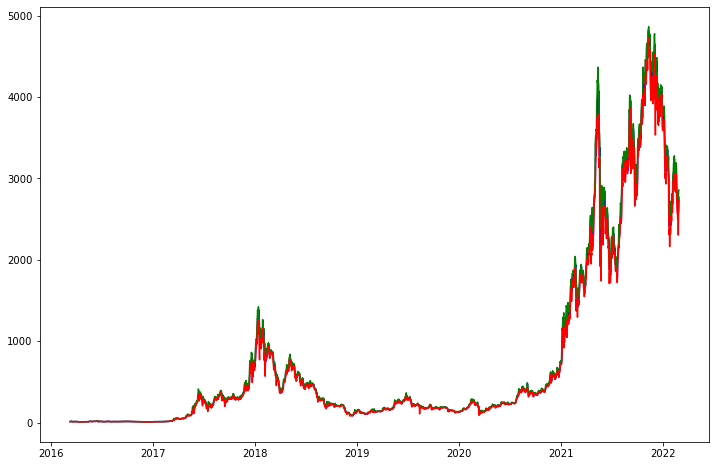

In [21]:
plt.figure(figsize=(12, 8))
plt.plot(df['Open'], color='blue')
plt.plot(df['High'], color='green')
plt.plot(df['Low'], color='red')

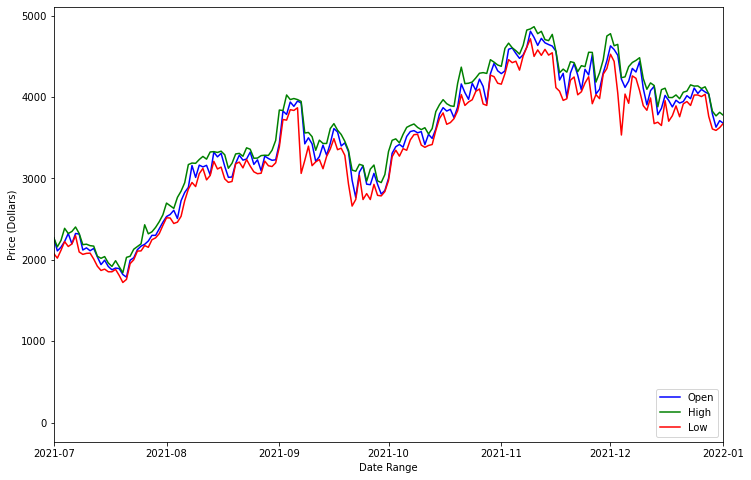

In [22]:
plt.figure(figsize=(12, 8))
plt.plot(df['Open'], color='blue', label="Open")
plt.plot(df['High'], color='green', label="High")
plt.plot(df['Low'], color='red', label="Low")
plt.xlim(datetime.date(2021, 7, 1), datetime.date(2022, 1, 1))
plt.xlabel("Date Range")
plt.ylabel("Price (Dollars)")
plt.legend(loc="lower right")

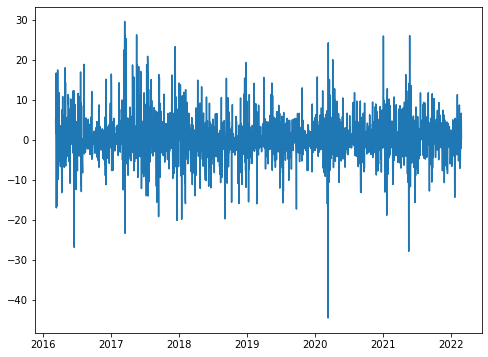

In [23]:
plt.figure(figsize=(8, 6))
plt.plot(df['Change %'])

<AxesSubplot:xlabel='Date'>

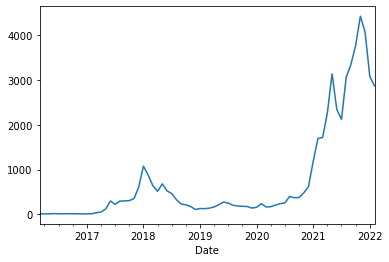

In [24]:
# Monthly Data plotting
monthly_df.plot()

Text(0, 0.5, 'Open cost')

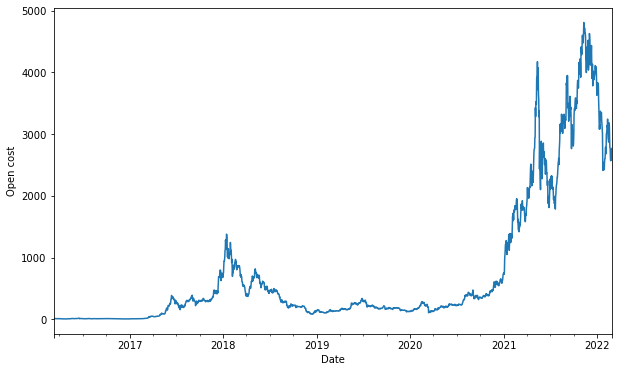

In [25]:
plt.figure(figsize=(10, 6))
df['Open'].plot()
plt.ylabel('Open cost')

Is this data stationary? (means mean, variance and covariance is constant over time.)

In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose

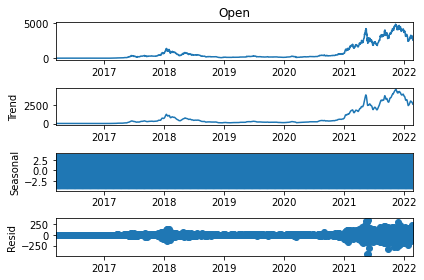

In [27]:
decomposition = seasonal_decompose(df['Open'], model='additive')
fig = decomposition.plot()
plt.show()

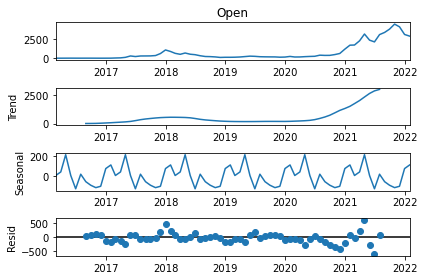

In [28]:
decomposition = seasonal_decompose(monthly_df, model='additive')
fig = decomposition.plot()
plt.show()

### To check if data is stationary

In [29]:
from statsmodels.tsa.stattools import adfuller

In [30]:
# h0: It is non stationary
# h1: It is stationary

def adfuller_test(data):
    result = adfuller(data)
    labels = ['ADF Test Statistic', 'p-value', '#Lags Used', 'Number of observations Used']
    for value, label in zip(result, labels):
        print(label+" : "+str(value))
    if result[1] <= 0.05:
        print("String evidence against the null hypothesis(h0), reject the null hypothesis. Data has no unit root and is stationary.")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary.")

In [31]:
adfuller_test(df['Open'])

ADF Test Statistic : -0.6662591838129458
p-value : 0.855296698193562
#Lags Used : 17
Number of observations Used : 2162
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary.


In [32]:
adfuller_test(monthly_df)

ADF Test Statistic : -2.4369312155069016
p-value : 0.131582933938798
#Lags Used : 9
Number of observations Used : 62
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary.


## Making Stationary

In [33]:
p_values = []
for i in range(1, 62):
    tdf = df['Open'].diff(periods=i)
    res = adfuller(tdf.dropna())
    p_values.append([i, res[1]])
p_values.sort(key = lambda x: x[1])
p_values[:10]

[[1, 4.681225357617667e-22],
 [27, 9.156466171739951e-18],
 [28, 1.4750988162069713e-16],
 [29, 1.8269636081275126e-15],
 [30, 1.6125750930815622e-14],
 [31, 4.682164629806114e-14],
 [3, 2.1853226650522645e-13],
 [32, 4.4794325057785297e-13],
 [33, 1.6398705983609478e-12],
 [4, 3.6319616848893667e-12]]

In [34]:
rate_diff = df['Open'].diff(periods=27)
rate_diff.dropna(inplace=True)

In [35]:
rate_diff

Date
2016-04-06     -0.80
2016-04-07     -0.99
2016-04-08     -1.90
2016-04-09     -3.23
2016-04-10     -5.92
               ...  
2022-02-22    111.12
2022-02-23    175.13
2022-02-24    153.88
2022-02-25     50.57
2022-02-26    167.46
Name: Open, Length: 2153, dtype: float64

In [36]:
adfuller_test(rate_diff)

ADF Test Statistic : -10.126417989884205
p-value : 9.156466171739951e-18
#Lags Used : 26
Number of observations Used : 2126
String evidence against the null hypothesis(h0), reject the null hypothesis. Data has no unit root and is stationary.


<AxesSubplot:xlabel='Date'>

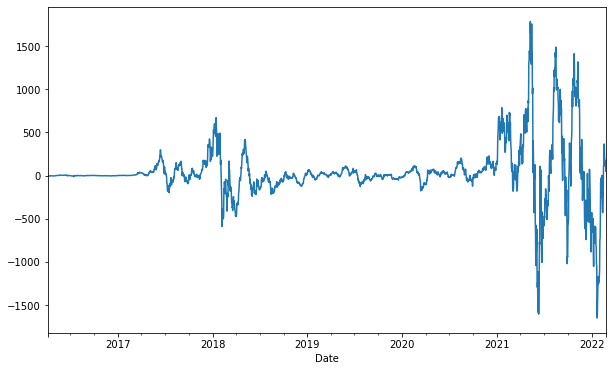

In [37]:
plt.figure(figsize=(10, 6))
rate_diff.plot()

Monthly data

In [38]:
p_values = []
for i in range(1, 12):
    tdf = monthly_df.diff(periods=i)
    res = adfuller(tdf.dropna())
    p_values.append([i, res[1]])
p_values.sort(key = lambda x: x[1])
p_values

[[9, 0.003405117750309404],
 [2, 0.02424998207084171],
 [4, 0.026705645814035027],
 [6, 0.06515747852513266],
 [7, 0.06617839368934689],
 [8, 0.06728861445870056],
 [3, 0.07738468363606771],
 [11, 0.1949285096647994],
 [1, 0.20244674490412473],
 [10, 0.5212717294610526],
 [5, 0.5767682296687643]]

In [39]:
seasonal_monthly_df = monthly_df.diff(periods=9)

In [40]:
seasonal_monthly_df

Date
2016-03-01            NaN
2016-04-01            NaN
2016-05-01            NaN
2016-06-01            NaN
2016-07-01            NaN
                 ...     
2021-10-01    2592.798710
2021-11-01    2733.930286
2021-12-01    2359.718065
2022-01-01     819.944280
2022-02-01    -271.101253
Freq: MS, Name: Open, Length: 72, dtype: float64

In [41]:
adfuller_test(seasonal_monthly_df.dropna())

ADF Test Statistic : -3.754802151211026
p-value : 0.003405117750309404
#Lags Used : 7
Number of observations Used : 55
String evidence against the null hypothesis(h0), reject the null hypothesis. Data has no unit root and is stationary.


<AxesSubplot:xlabel='Date'>

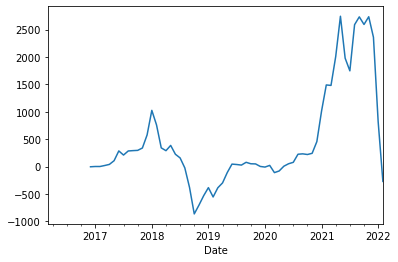

In [42]:
seasonal_monthly_df.plot()

## Visulizing PACF and ACF Plots

In [43]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

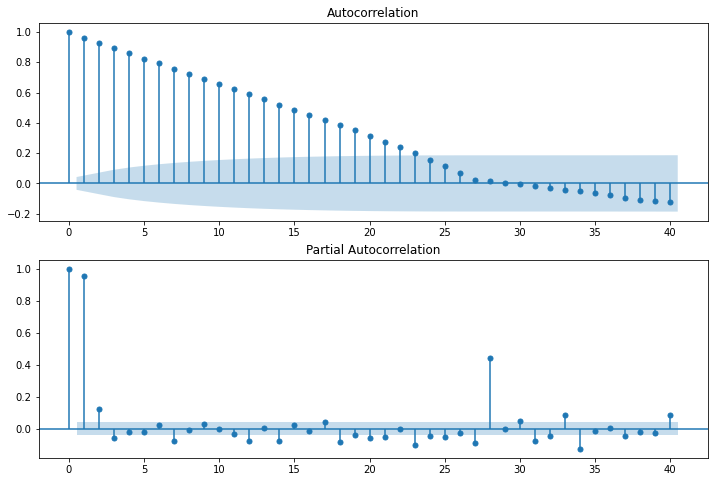

In [44]:
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = plot_acf(rate_diff.dropna(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(rate_diff.dropna(), lags=40, ax=ax2)

AR value must be 2 (p). q will be 0

C:\Users\nihal\Anaconda3\envs\MLprojects\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


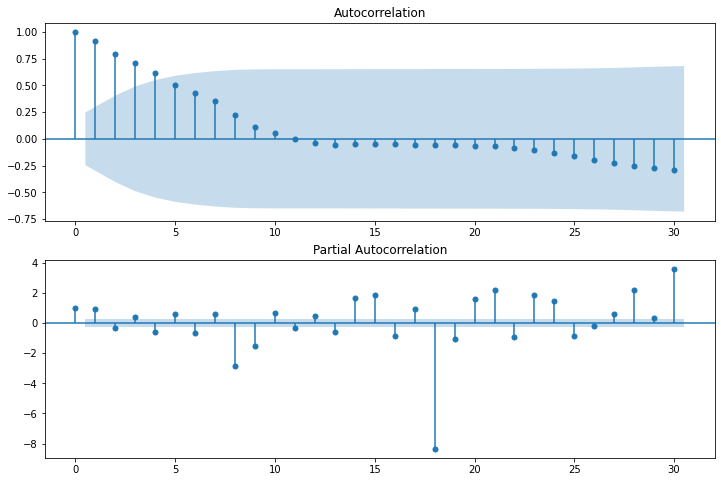

In [45]:
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = plot_acf(seasonal_monthly_df.dropna(), lags=30, ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(seasonal_monthly_df.dropna(), lags=30, ax=ax2)

AR value must be 2 (p). q will be 0

## Modeling

In [46]:
# Spliting the data into training and testing
X = df['Open']
print("Total Length of data:",len(X))
print("93% of data will be:", len(X)*0.93)
train_limit = int(len(X)*0.93)

Total Length of data: 2180
93% of data will be: 2027.4


In [47]:
train_x = X[:train_limit]
test_x = X[train_limit:]

In [48]:
test_x

Date
2021-09-27    3061.86
2021-09-28    2926.04
2021-09-29    2807.15
2021-09-30    2851.06
2021-10-01    2999.86
               ...   
2022-02-22    2569.19
2022-02-23    2637.38
2022-02-24    2578.54
2022-02-25    2596.52
2022-02-26    2767.58
Name: Open, Length: 153, dtype: float64

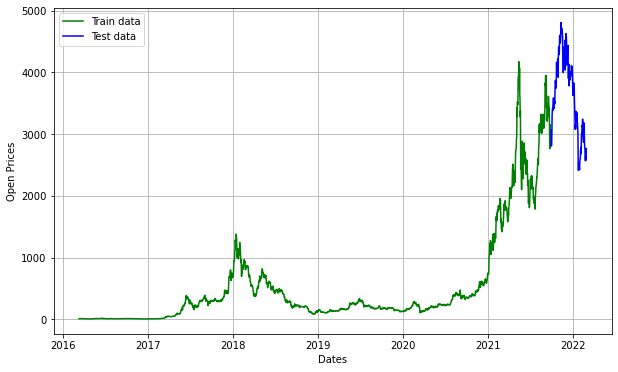

In [49]:
plt.figure(figsize=(10, 6))
plt.grid(True)
plt.xlabel("Dates")
plt.ylabel("Open Prices")
plt.plot(train_x, 'green', label='Train data')
plt.plot(test_x, 'blue', label='Test data')
plt.legend()

##  ARIMA Model

In [50]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [51]:
model_arima = ARIMA(train_x, order=(4, 1, 0))
model_arima_fit = model_arima.fit()

C:\Users\nihal\Anaconda3\envs\MLprojects\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\nihal\Anaconda3\envs\MLprojects\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provi

In [52]:
arima_pred = model_arima_fit.predict(start=train_limit, end=len(X)-1)

In [53]:
arima_pred_df = pd.DataFrame(arima_pred)
arima_pred_df = arima_pred_df.set_index(test_x.index)
arima_pred_df

,0
Date,
2021-09-27,15.076420
2021-09-28,-4.296463
2021-09-29,-15.420865
2021-09-30,2.944575
2021-10-01,0.964960
...,...
2022-02-22,1.432007
2022-02-23,1.432007
2022-02-24,1.432007


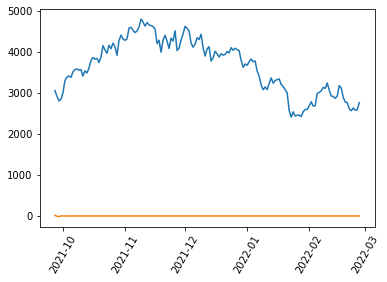

In [54]:
plt.plot(test_x)
plt.plot(arima_pred_df)
plt.xticks(rotation=60)
# plt.xlim(datetime.date(2021, 1, 1), datetime.date(2021, 5, 1))
plt.show()

As we can see that it does not do a good job as it is a very basic model and does not have seasonality involved.

In [55]:
monthly_df

Date
2016-03-01      11.731364
2016-04-01       9.033333
2016-05-01      11.184839
2016-06-01      14.416667
2016-07-01      11.891935
                 ...     
2021-10-01    3775.876774
2021-11-01    4429.586000
2021-12-01    4076.529355
2022-01-01    3084.661613
2022-02-01    2870.724231
Freq: MS, Name: Open, Length: 72, dtype: float64

In [56]:
monthly_train_len = len(monthly_df)*0.9
monthly_train_len

64.8

In [77]:
monthly_df.index[64]

Timestamp('2021-07-01 00:00:00', freq='MS')

In [58]:
train_monthly = monthly_df[:int(monthly_train_len)]
test_monthly = monthly_df[int(monthly_train_len):]

In [59]:
model_monthly = ARIMA(train_monthly, order=(4, 1, 0))
model_arima_fit = model_arima.fit()

C:\Users\nihal\Anaconda3\envs\MLprojects\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [60]:
arima_pred_monthly = model_arima_fit.predict(start=int(monthly_train_len), end=len(monthly_df)-1)

In [68]:
arima_pred_monthly_df = pd.DataFrame(arima_pred_monthly)
arima_pred_monthly_df.set_index(test_monthly.index, inplace=True)
arima_pred_monthly_df

,0
Date,
2021-07-01,1.265503
2021-08-01,1.327203
2021-09-01,1.304686
2021-10-01,1.448335
2021-11-01,1.361970
2021-12-01,1.202255
2022-01-01,1.232892
2022-02-01,1.300655


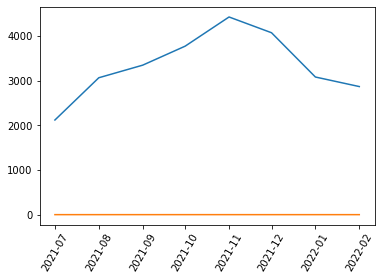

In [69]:
plt.plot(test_monthly)
plt.plot(arima_pred_monthly_df)
plt.xticks(rotation=60)
# plt.xlim(datetime.date(2016, 5, 13), datetime.date(2016, 5, 20))
plt.show()

## ARIMA Model with updating train with current data

In [70]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [71]:
training_data = list(train_x)
testing_data = list(test_x)

In [72]:
model_predictions = []
n_test_obser = len(testing_data)

In [73]:
for i in range(n_test_obser):
    model = ARIMA(training_data, order = (4,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = list(output[0])[0]
    model_predictions.append(yhat)
    actual_test_value = testing_data[i]
    training_data.append(actual_test_value)

C:\Users\nihal\Anaconda3\envs\MLprojects\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [74]:
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 2178
Model:                 ARIMA(4, 1, 0)   Log Likelihood              -12256.264
Method:                       css-mle   S.D. of innovations             67.246
Date:                Fri, 04 Mar 2022   AIC                          24524.529
Time:                        10:39:38   BIC                          24558.646
Sample:                             1   HQIC                         24537.002
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1856      1.434      0.827      0.408      -1.626       3.997
ar.L1.D.y     -0.0834      0.021     -3.900      0.000      -0.125      -0.041
ar.L2.D.y      0.0126      0.021      0.586      0.5

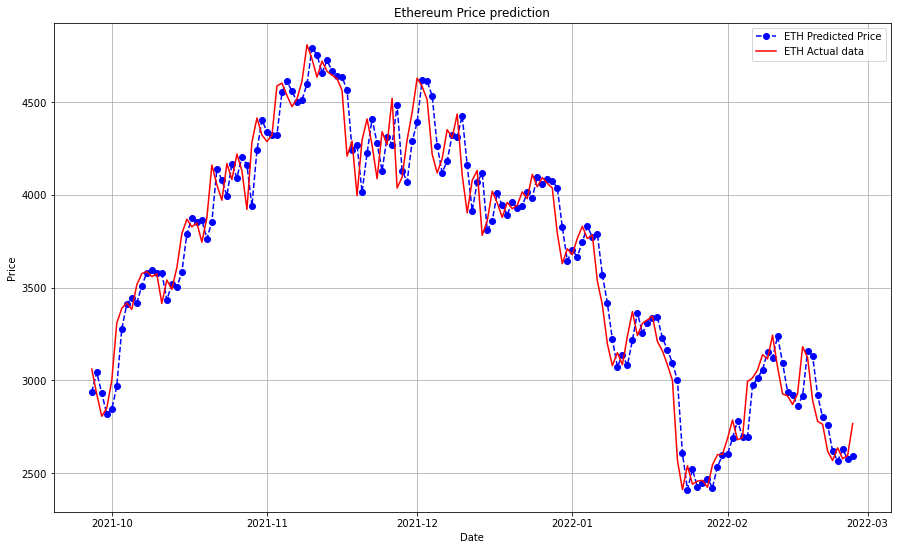

In [75]:
plt.figure(figsize=(15, 9))
plt.grid()

date_range = df[train_limit:].index
plt.plot(date_range, model_predictions, color='blue', marker='o', linestyle='dashed', label="ETH Predicted Price")
plt.plot(date_range, testing_data, color='red', label='ETH Actual data')

plt.title('Ethereum Price prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [76]:
# Mean absolute percentage error
mape = np.mean(np.abs(np.array(model_predictions) - np.array(testing_data))/np.abs(testing_data))
print("MAPE:", mape)

MAPE: 0.032230431157146765


In [77]:
mean_squared_error(testing_data, model_predictions)

21977.53172409015

In [78]:
np.mean(testing_data)

3648.5073202614385

## SARIMA

In [79]:
import statsmodels.api as sm

From above:  
AR value must be 2 (p). q will be 0. d = 1, season = 27  
AR value must be 2 (p). q will be 0. d = 1, season = 9

In [80]:
sarima_model_daily = sm.tsa.statespace.SARIMAX(train_x, order=(2, 1, 0), seasonal_order=(2, 1, 0, 27))
result_daily = sarima_model_daily.fit()

C:\Users\nihal\Anaconda3\envs\MLprojects\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\nihal\Anaconda3\envs\MLprojects\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


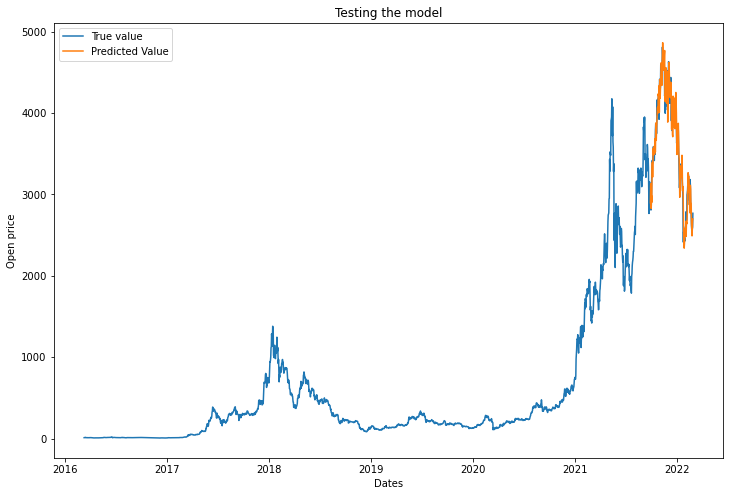

In [92]:
plt.figure(figsize=(12, 8))
daily_prediction = result_daily.predict(start=train_limit, end=len(X)-1)
plt.plot(X.index, X, label="True value")
plt.plot(daily_prediction, label="Predicted Value")
plt.xlabel("Dates")
plt.ylabel("Open price")
plt.title("Testing the model")
plt.legend()

In [82]:
sarima_model_daily = sm.tsa.statespace.SARIMAX(df['Open'], order=(2, 1, 0), seasonal_order=(2, 1, 0, 27))
result_daily = sarima_model_daily.fit()

C:\Users\nihal\Anaconda3\envs\MLprojects\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\nihal\Anaconda3\envs\MLprojects\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


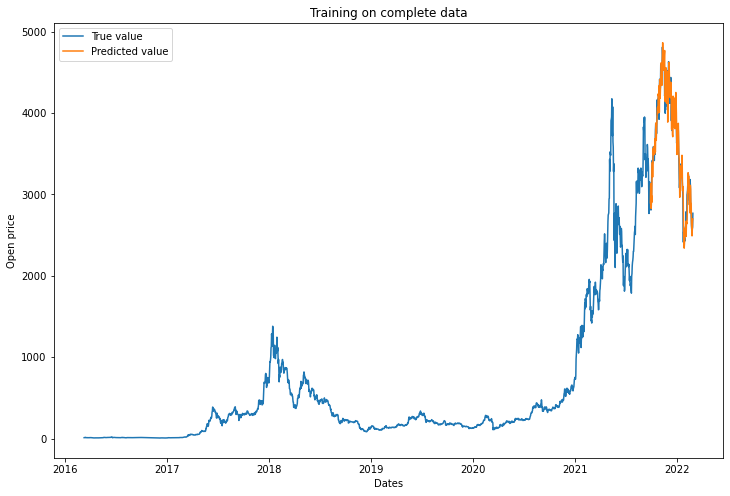

In [94]:
plt.figure(figsize=(12, 8))
daily_prediction = result_daily.predict(start=train_limit, end=len(X)-1)
plt.plot(X.index, X, label="True value")
plt.plot(daily_prediction, label="Predicted value")
plt.xlabel("Dates")
plt.ylabel("Open price")
plt.title("Training on complete data")
plt.legend()

In [84]:
X_monthly = monthly_df
print("Total Length of data:",len(X_monthly))
print("90% of data will be:", len(X_monthly)*0.9)
train_limit_monthly = int(len(X_monthly)*0.9)

Total Length of data: 72
90% of data will be: 64.8


In [85]:
train_x_monthly = X_monthly[:train_limit_monthly]
test_x_monthly = X_monthly[train_limit_monthly:]

In [86]:
sarima_model_monthly = sm.tsa.statespace.SARIMAX(train_x_monthly, order=(2, 1, 0), seasonal_order=(1, 1, 0, 9))
result_monthly = sarima_model_monthly.fit()

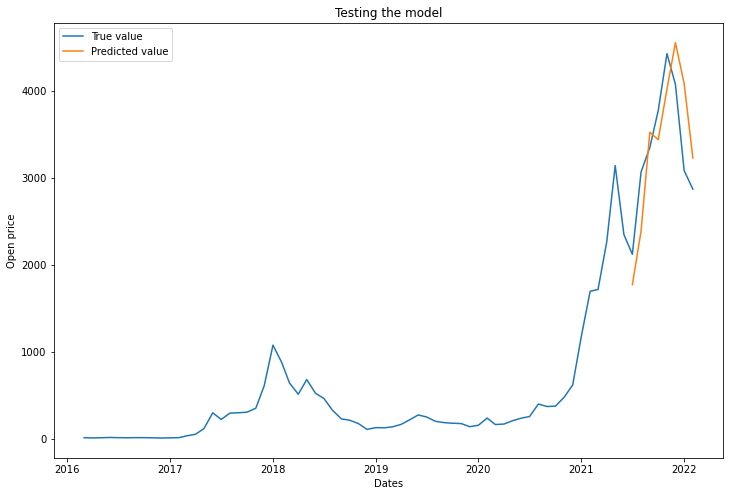

In [95]:
plt.figure(figsize=(12, 8))
monthly_prediction = result_monthly.predict(start=train_limit_monthly, end=len(X_monthly)-1)
plt.plot(X_monthly.index, X_monthly, label="True value")
plt.plot(monthly_prediction, label="Predicted value")
plt.xlabel("Dates")
plt.ylabel("Open price")
plt.title("Testing the model")
plt.legend()

In [88]:
sarima_model_monthly = sm.tsa.statespace.SARIMAX(monthly_df, order=(2, 1, 0), seasonal_order=(1, 1, 0, 9))
result_monthly = sarima_model_monthly.fit()

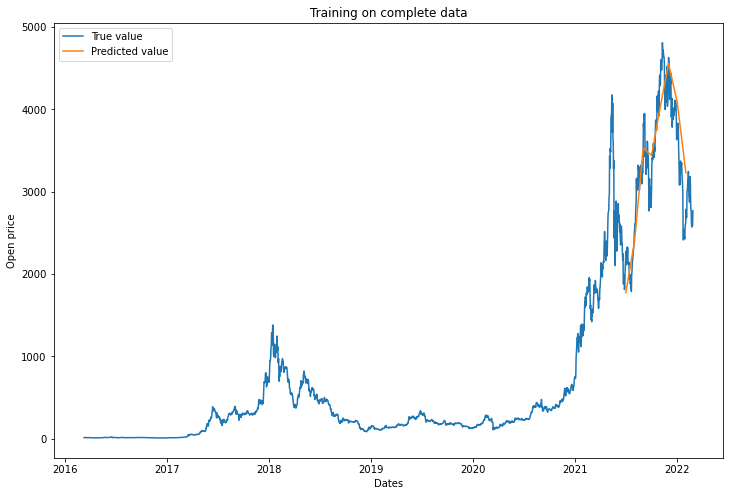

In [96]:
plt.figure(figsize=(12, 8))
monthly_prediction = result_monthly.predict(start=train_limit_monthly, end=len(X_monthly)-1)
plt.plot(X.index, X, label="True value")
plt.plot(monthly_prediction, label="Predicted value")
plt.xlabel("Dates")
plt.ylabel("Open price")
plt.title("Training on complete data")
plt.legend()

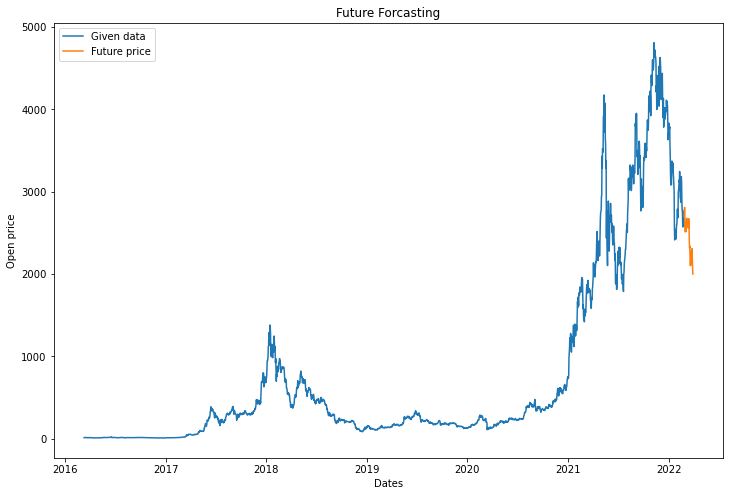

In [97]:
plt.figure(figsize=(12, 8))
future_pred = result_daily.predict(start=len(X)-1, end=len(X)+31)
plt.plot(X.index, X, label="Given data")
plt.plot(future_pred, label="Future price")
plt.xlabel("Dates")
plt.ylabel("Open price")
plt.title("Future Forcasting")
plt.legend()

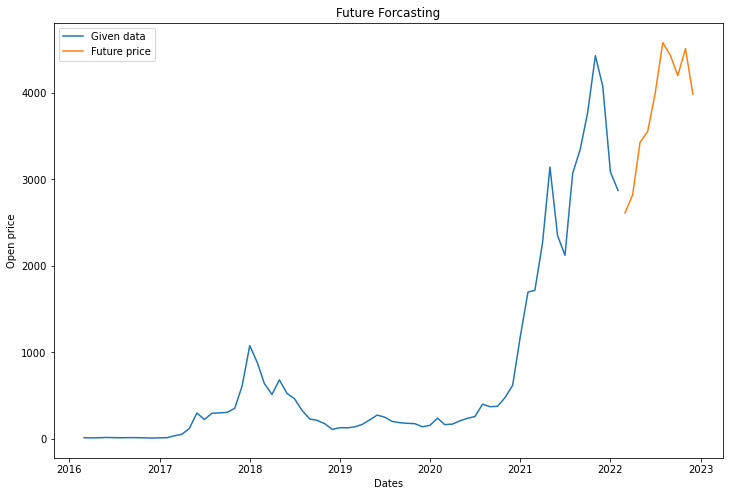

In [98]:
plt.figure(figsize=(12, 8))
future_pred_monthly = result_monthly.predict(start=len(X_monthly), end=len(X_monthly)+9)
plt.plot(X_monthly.index, X_monthly, label="Given data")
plt.plot(future_pred_monthly, label="Future price")
plt.xlabel("Dates")
plt.ylabel("Open price")
plt.title("Future Forcasting")
plt.legend()